<a href="https://colab.research.google.com/github/AnulipiJana/Citation-Analysis--Research-Paper/blob/main/Citation_Network_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODULE1
1. Install and Import Libraries
2. Data Preprocessing

## Install & Import Libraries

In [ ]:
!pip install networkx numpy pandas scikit-learn lightgbm

In [ ]:
!pip install dask-expr

In [ ]:
!pip install python-louvain

In [ ]:
!pip install prophet

In [ ]:
! pip install pandas

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.preprocessing import MinMaxScaler
import lightgbm as lgb
import matplotlib.pyplot as plt
import ast

##Load, Preprocess & Visualize dataset

### Load Dataset
columns: abstract, authors, n_citation, references, title, venue, year, id

In [ ]:
from google.colab import files

uploaded = files.upload()  # Upload dataset
df = pd.read_csv(list(uploaded.keys())[0])  # Read dataset into a pandas DataFrame

Saving filtered_1980.csv to filtered_1980.csv


In [ ]:
data = pd.read_csv('filtered_1980.csv')
data

,abstract,authors,n_citation,references,title,venue,year,id
0,NaN,['Frederic B. Fitch'],50,[],Modal functions in two-valued logic,Journal of Symbolic Logic,1937,4fca075d-965a-4022-8891-e9d1e326e464
1,NaN,['W. V. Quine'],18,[],Logic based on inclusion and abstraction,Journal of Symbolic Logic,1937,b6b5baab-032f-4598-aeb2-f2bb7f12b4c7
2,NaN,['W. V. Quine'],21,['7dc8b493-dd60-4580-bcd2-cea02ca46473'],On the Theory of Types,Journal of Symbolic Logic,1938,f821fbaa-1f89-427f-b5e8-4c904a02e2e7
3,NaN,['J. Barkley Rosser'],50,[],Definition by Induction in Quine's New Foundat...,Journal of Symbolic Logic,1939,c847d855-6db6-4fa6-b4d7-a134909fd705
4,NaN,['J. Barkley Rosser'],50,[],The Burali-Forti Paradox,Journal of Symbolic Logic,1942,ec66efde-c5cc-43ec-a140-114f6c65ac2a
...,...,...,...,...,...,...,...,...
4486,NaN,"['Petr Hájek', 'Pavel Kalášek', 'Petr Kurka']",0,NaN,On dynamic logic.,Kybernetika,1980,b57aac0d-f844-41ab-9c7f-4127a90274fb
4487,"Let \{(U_{i},V_{i})\}_{i=1}^{n} be a source of...","['Thomas M. Cover', 'Abbas El Gamal', 'Masoud ...",280,"['0c17b2f6-8003-44db-a49c-ee1e68638231', '850e...",Multiple access channels with arbitrarily corr...,IEEE Transactions on Information Theory,1980,a4cec35b-c956-4006-9963-e9df0007c434
4488,NaN,['Arto Salomaa'],50,"['b001b8d1-2cc3-4b88-9f82-0f0b0a871c8e', 'c0b1...",Grammatical Families,"international colloquium on automata, language...",1980,49829369-a417-4a86-bc78-caca4b6832fc
4489,Parallel counters are multiple input circuits ...,['K. W. Current'],4,[],Pipelined Binary Parallel Counters Employing L...,IEEE Transactions on Computers,1980,7d9f36a2-738f-4152-b60b-9a135d76bbc1


### Data Preprocess
data information and cleaning

In [ ]:
data.shape

(4491, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4491 entries, 0 to 4490
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   abstract    3330 non-null   object
 1   authors     4491 non-null   object
 2   n_citation  4491 non-null   int64 
 3   references  3616 non-null   object
 4   title       4491 non-null   object
 5   venue       4008 non-null   object
 6   year        4491 non-null   int64 
 7   id          4491 non-null   object
dtypes: int64(2), object(6)
memory usage: 280.8+ KB


In [ ]:
missing_values = data.isnull().sum()

# Display summary of cleaned data
print("------ Missing values------\n", missing_values)

------ Missing values------
 abstract      1161
authors          0
n_citation       0
references     875
title            0
venue          483
year             0
id               0
dtype: int64


### Data Visualization

Text(0.5, 1.0, 'Years VS Citations')

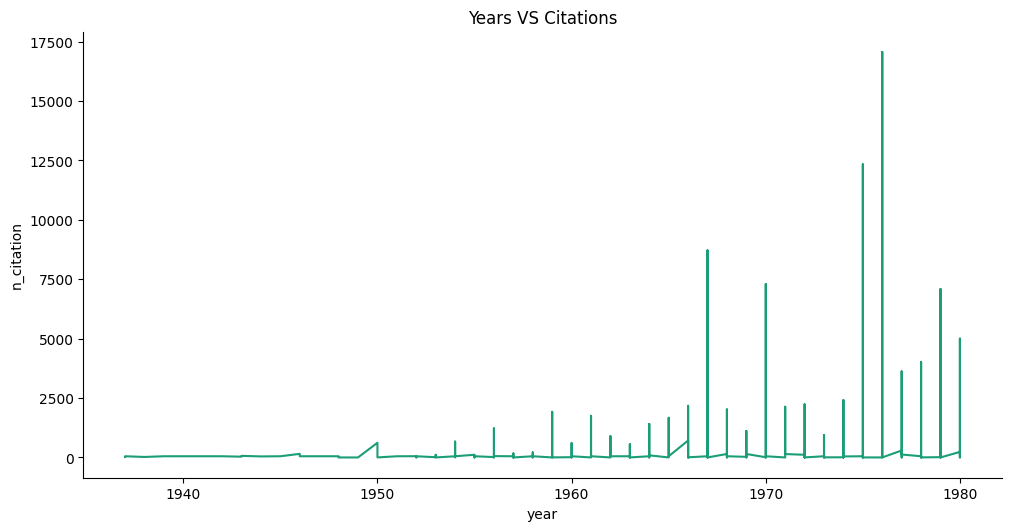

In [ ]:
# @title year vs n_citation

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['n_citation']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('n_citation')
plt.title("Years VS Citations")

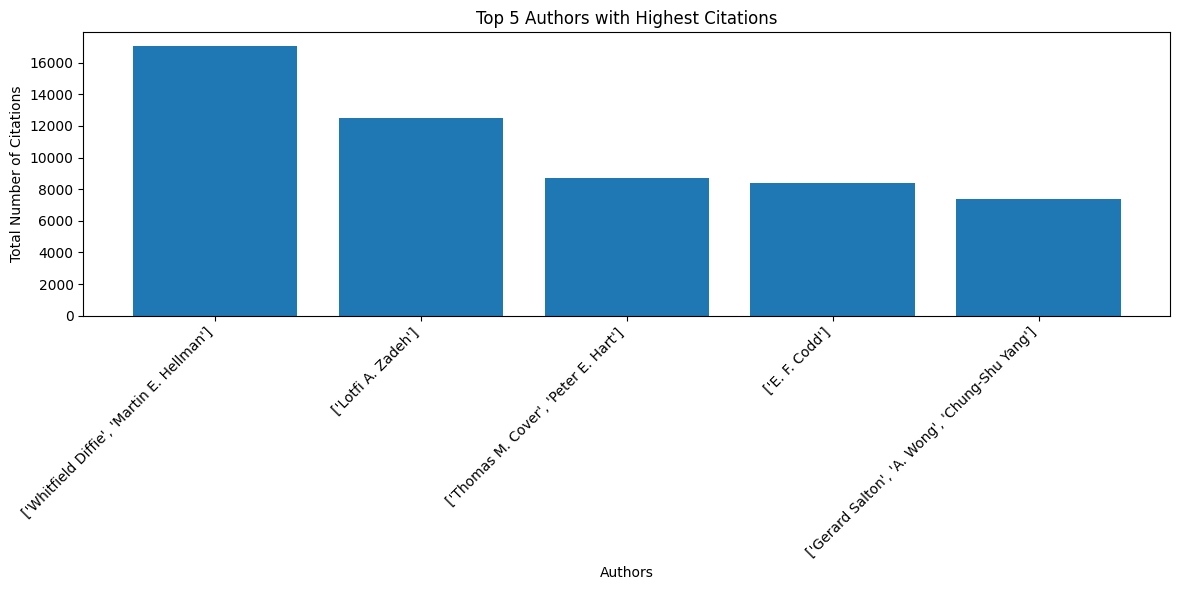

In [ ]:
# @title Highest Citated Author

top_n = 5
# Sort by citations (descending) and select top N
top_authors = data.groupby('authors')['n_citation'].sum().sort_values(ascending=False).head(top_n)

plt.figure(figsize=(12, 6))
plt.bar(top_authors.index, top_authors.values)
plt.xlabel('Authors')
plt.ylabel('Total Number of Citations')
plt.title(f'Top {top_n} Authors with Highest Citations')
plt.xticks(rotation=45, ha='right')  # Rotate author names for readability
plt.tight_layout()
plt.show()

<ipython-input-9-5ca2d12e723a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_cited['title_short'] = top_cited['title'].apply(lambda x: x[:40] + "..." if len(x) > 40 else x)


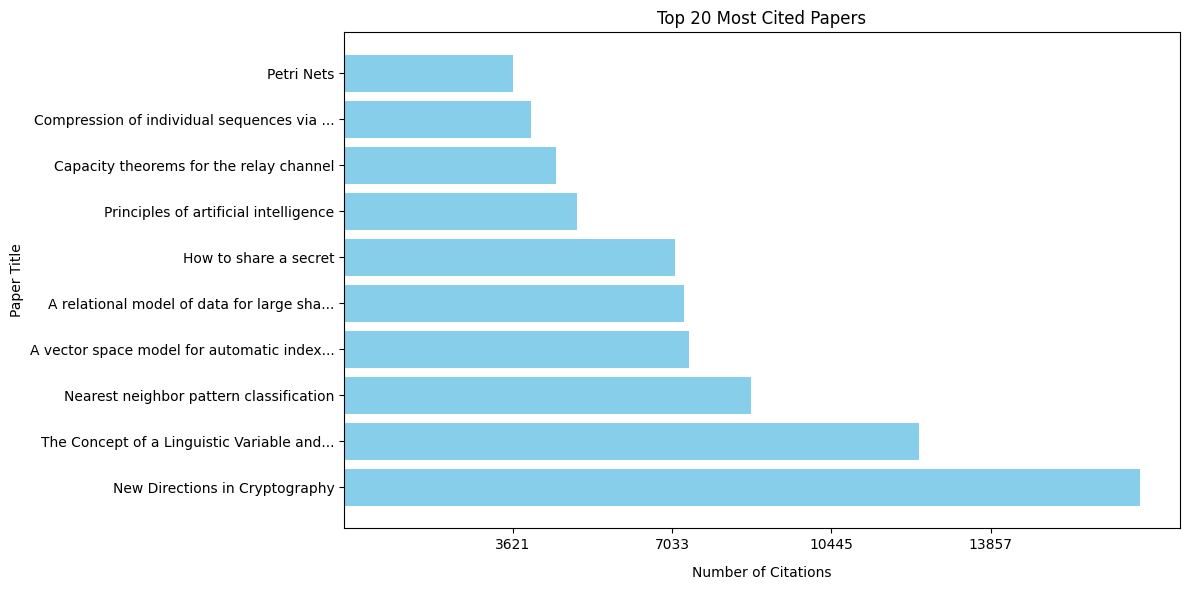

In [ ]:
# @title Popular Papers

# Sort the dataframe by n_citation in descending order
data_sorted = data.sort_values(by='n_citation', ascending=False)

top_cited = data_sorted.head(10) #select top papers

# Truncate titles or abstracts to a specific length for better readability
top_cited['title_short'] = top_cited['title'].apply(lambda x: x[:40] + "..." if len(x) > 40 else x)

# Prepare data for the bar chart
titles = top_cited['title_short'].to_numpy()
citations = top_cited['n_citation'].to_numpy()

# Create the bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size as desired
plt.barh(titles, citations, color='skyblue')  # Horizontal bar chart for readability
plt.xlabel('Number of Citations', labelpad=10)
plt.ylabel('Paper Title')
plt.title('Top 20 Most Cited Papers')

# Reduce x-axis tick labels for better readability
plt.xticks(np.arange(min(citations), max(citations)+1, step=int(max(citations)/5)))  # Adjust step size as needed

plt.tight_layout()
plt.show()

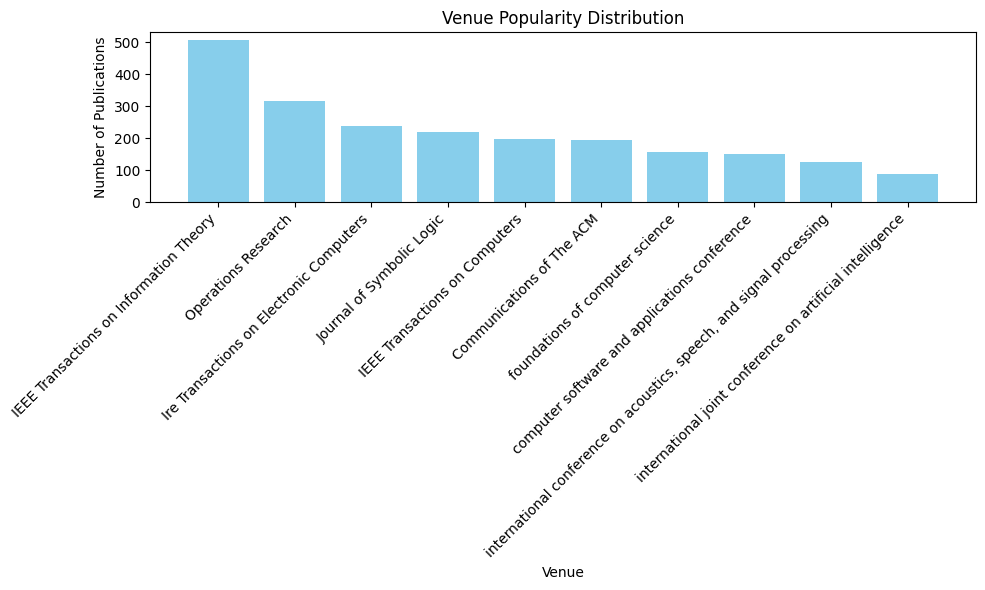

In [ ]:
# @title Popular Venue

# Calculate venue publication counts
venue_counts = data['venue'].value_counts().sort_values(ascending=False)

# Prepare data for visualization
top_n_venues = 10
venue_counts = venue_counts.head(top_n_venues)

venues = venue_counts.index.to_numpy()
counts = venue_counts.to_numpy()

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(venues, counts, color='skyblue')
plt.xlabel('Venue')
plt.ylabel('Number of Publications')
plt.title('Venue Popularity Distribution')

# Rotate venue labels for readability with many venues
plt.xticks(rotation=45, ha='right')

#display
plt.tight_layout()
plt.show()

# MODULE2
### Build & Visualizes Network Graphs
- Author Citation
- Paper Citatioin
- Co-Authorship

### Check no. of authors and references/ paper

In [ ]:
def extract_paper_info(row):
    # Number of authors from the 'AF' field (assuming authors are separated by ';')
    num_authors = len(row['authors'].split(',')) if pd.notna(row['authors']) else 0

    # Number of references (assuming a 'References' field where references are counted)
    num_references = len(row['references'].split(',')) if pd.notna(row.get('references')) else 0

    return num_authors, num_references

#Apply the function to each row of the dataframe
data[['Num_Authors', 'Num_References']] = data.apply(extract_paper_info, axis=1, result_type='expand')

#Output the resulting dataframe with calculated columns
print(data[['id', 'Num_Authors', 'Num_References']])

                                        id  Num_Authors  Num_References
0     4fca075d-965a-4022-8891-e9d1e326e464            1               1
1     b6b5baab-032f-4598-aeb2-f2bb7f12b4c7            1               1
2     f821fbaa-1f89-427f-b5e8-4c904a02e2e7            1               1
3     c847d855-6db6-4fa6-b4d7-a134909fd705            1               1
4     ec66efde-c5cc-43ec-a140-114f6c65ac2a            1               1
...                                    ...          ...             ...
4486  b57aac0d-f844-41ab-9c7f-4127a90274fb            3               0
4487  a4cec35b-c956-4006-9963-e9df0007c434            3               3
4488  49829369-a417-4a86-bc78-caca4b6832fc            1               3
4489  7d9f36a2-738f-4152-b60b-9a135d76bbc1            1               1
4490  7b7b8ac1-d61f-4b87-b745-73352713e600            1              13

[4491 rows x 3 columns]


##**Author Citation Network**
connection bw a auther cited by another authors

###Create Author Citation Network

In [ ]:
df['references'] = df['references'].fillna('').astype(str)

In [ ]:
df.head()

,abstract,authors,n_citation,references,title,venue,year,id
0,NaN,['Frederic B. Fitch'],50,[],Modal functions in two-valued logic,Journal of Symbolic Logic,1937,4fca075d-965a-4022-8891-e9d1e326e464
1,NaN,['W. V. Quine'],18,[],Logic based on inclusion and abstraction,Journal of Symbolic Logic,1937,b6b5baab-032f-4598-aeb2-f2bb7f12b4c7
2,NaN,['W. V. Quine'],21,['7dc8b493-dd60-4580-bcd2-cea02ca46473'],On the Theory of Types,Journal of Symbolic Logic,1938,f821fbaa-1f89-427f-b5e8-4c904a02e2e7
3,NaN,['J. Barkley Rosser'],50,[],Definition by Induction in Quine's New Foundat...,Journal of Symbolic Logic,1939,c847d855-6db6-4fa6-b4d7-a134909fd705
4,NaN,['J. Barkley Rosser'],50,[],The Burali-Forti Paradox,Journal of Symbolic Logic,1942,ec66efde-c5cc-43ec-a140-114f6c65ac2a


In [ ]:
# Function to safely convert strings to lists
def safe_literal_eval(val):
    try:
        return ast.literal_eval(val) if isinstance(val, str) else []
    except (SyntaxError, ValueError):
        return []

# Convert 'references' and 'authors' columns to lists
df["references"] = df["references"].apply(safe_literal_eval)
df["authors"] = df["authors"].apply(lambda x: [author.strip() for author in x.split(",")] if isinstance(x, str) else [])

# Create edges (citing_author -> cited_author)
edges = []
for _, row in df.iterrows():
    citing_authors = row["authors"]  # List of authors for the current paper
    for ref_id in row["references"]:
        # Find the referenced paper's authors
        cited_paper = df[df["id"] == ref_id]
        if not cited_paper.empty:
            cited_authors = cited_paper.iloc[0]["authors"]  # List of authors of the cited paper
            for citing_author in citing_authors:
                for cited_author in cited_authors:
                    edges.append((citing_author, cited_author))

# Create directed graph
G_author_citation = nx.DiGraph()
G_author_citation.add_edges_from(edges)

# Print graph information
print(f"Total Nodes (Authors): {len(G_author_citation.nodes())}")
print(f"Total Edges (Citations): {len(G_author_citation.edges())}")

Total Nodes (Authors): 2456
Total Edges (Citations): 5548


###Visualize Author Citation Network

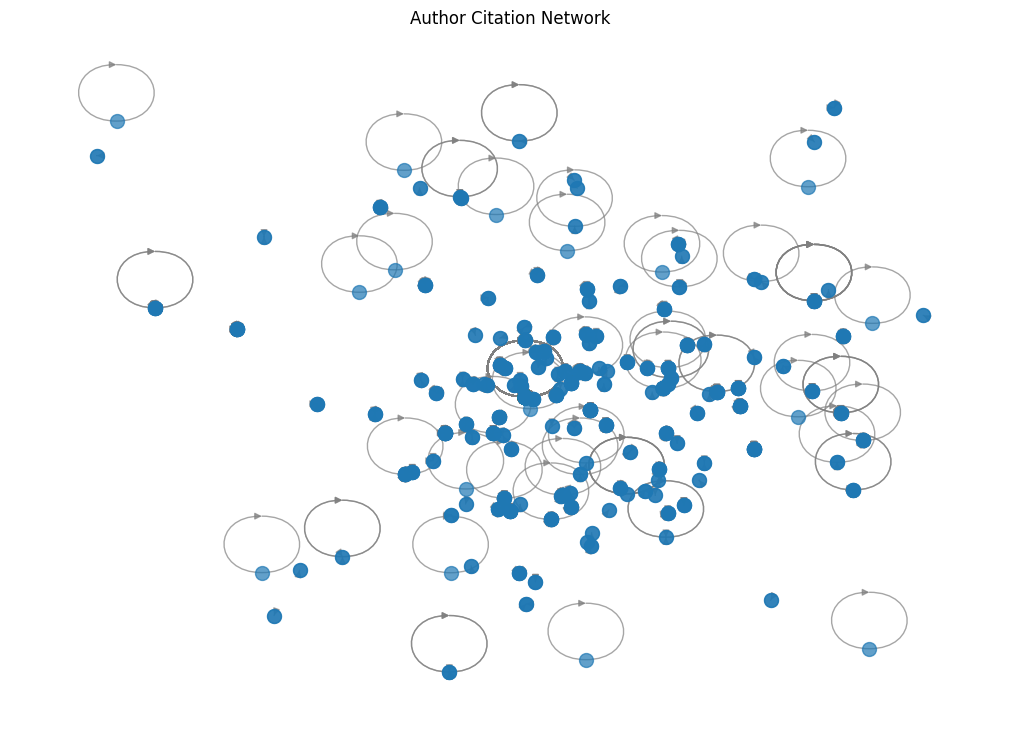

In [ ]:
plt.figure(figsize=(10, 7))
pos = nx.spectral_layout(G_author_citation)  # Use spectral layout
nx.draw(G_author_citation, pos, node_size=100, alpha=0.7, edge_color="gray")

plt.title("Author Citation Network")
plt.show()

###Compute 4 Types of Centrality Measures

In [ ]:
# Compute centrality measures
degree_centrality = nx.degree_centrality(G_author_citation)
closeness_centrality = nx.closeness_centrality(G_author_citation)
betweenness_centrality = nx.betweenness_centrality(G_author_citation)
eigenvector_centrality = nx.eigenvector_centrality(G_author_citation, max_iter=500)

# Store results in DataFrame
centrality_df = pd.DataFrame({
    "Author": list(G_author_citation.nodes()),
    "Degree Centrality": [degree_centrality[author] for author in G_author_citation.nodes()],
    "Closeness Centrality": [closeness_centrality[author] for author in G_author_citation.nodes()],
    "Betweenness Centrality": [betweenness_centrality[author] for author in G_author_citation.nodes()],
    "Eigenvector Centrality": [eigenvector_centrality[author] for author in G_author_citation.nodes()]
})

# Save to CSV
centrality_df.to_csv("author_citation_metrics.csv", index=False)
print("\nCentrality measures saved to 'author_citation_metrics.csv'")


Centrality measures saved to 'author_citation_metrics.csv'


In [ ]:
author_citation_data = pd.read_csv("author_citation_metrics.csv")
author_citation_data

,Author,Degree Centrality,Closeness Centrality,Betweenness Centrality,Eigenvector Centrality
0,['D. M. Mackay'],0.000815,0.000000,0.000000,1.342338e-25
1,['Robert Price'],0.005703,0.018957,0.000055,3.413160e-05
2,['Kenneth S. Miller',0.004888,0.020237,0.000000,7.111951e-06
3,'L. A. Zadeh'],0.003259,0.019952,0.000000,7.111951e-06
4,['John P. Nash'],0.002444,0.000000,0.000000,3.815154e-39
...,...,...,...,...,...
2451,['Dana S. Nau'],0.001222,0.000000,0.000000,3.815154e-39
2452,['Wesley E. Snyder',0.000407,0.000000,0.000000,3.815154e-39
2453,'D. Allen Tang'],0.000407,0.000000,0.000000,3.815154e-39
2454,'Abbas El Gamal',0.000407,0.000000,0.000000,3.815154e-39


### Best authors based on centrality measure of auther citation

In [ ]:
# Normalize values between 0-1 for fair ranking & explicitly cast to float
centrality_df.iloc[:, 1:] = centrality_df.iloc[:, 1:].apply(lambda x: (x - x.min()) / (x.max() - x.min())).astype(float)

# Compute overall score
centrality_df["Overall Score"] = centrality_df.iloc[:, 1:].sum(axis=1)

# Sort authors based on Overall Score (Descending)
centrality_df = centrality_df.sort_values(by="Overall Score", ascending=False)

# Get Top 10 Best Authors
top_5_authors = centrality_df.head(10)

# Display Results
print("Top 10 Authors Based on Centrality Measures:")
print(top_5_authors[
    ["Author", "Degree Centrality", "Betweenness Centrality",
     "Closeness Centrality", "Eigenvector Centrality", "Overall Score"]
].to_string(index=False))

Top 5 Authors Based on Centrality Measures:
                 Author  Degree Centrality  Betweenness Centrality  Closeness Centrality  Eigenvector Centrality  Overall Score
         ['E. F. Codd']           1.000000                0.073723              0.924354            3.544970e-04       1.998432
     ['Robert M. Gray']           0.475610                0.853205              0.548851            9.143501e-04       1.878580
     ['Thomas M. Cover'           0.280488                1.000000              0.344310            5.165682e-08       1.624798
     ['C. A. R. Hoare']           0.500000                0.081684              1.000000            5.785419e-07       1.581685
          ['Jacob Ziv']           0.329268                0.471078              0.614503            1.521880e-03       1.416371
   ['C. V. Ramamoorthy'           0.512195                0.593115              0.297161            5.672673e-11       1.402471
           'Jacob Ziv']           0.292683                0.

### #Visualize Centrality Graph

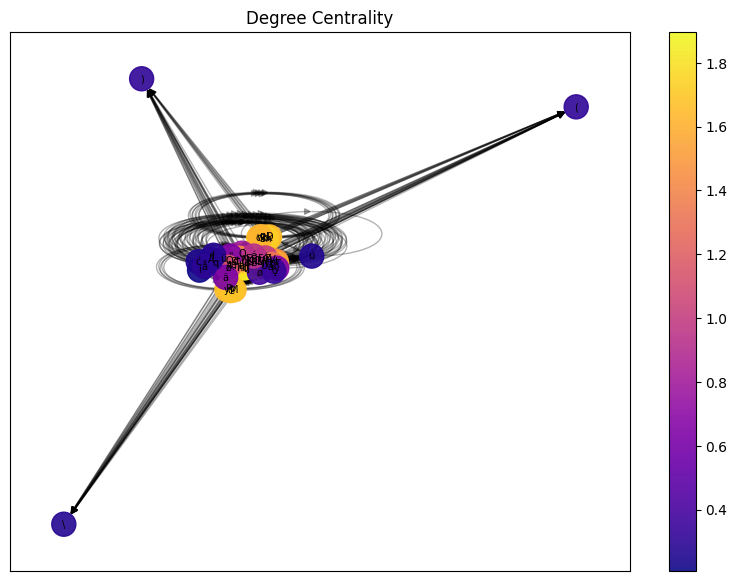

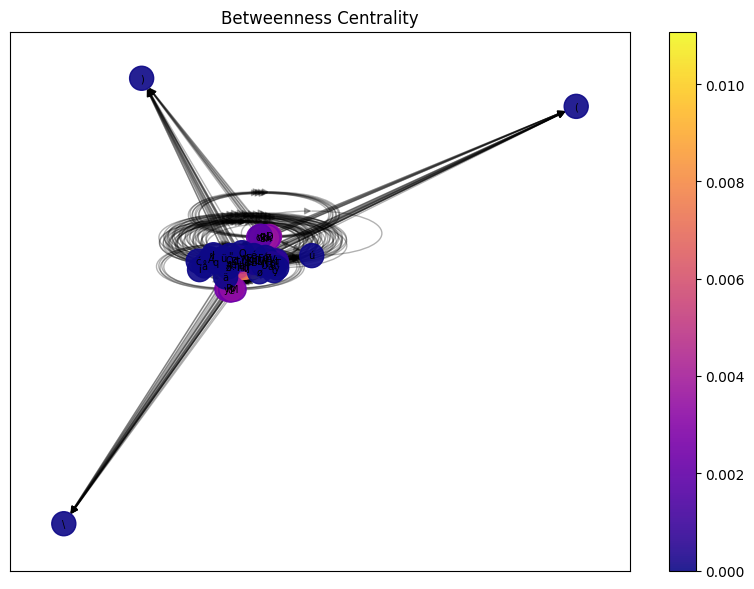

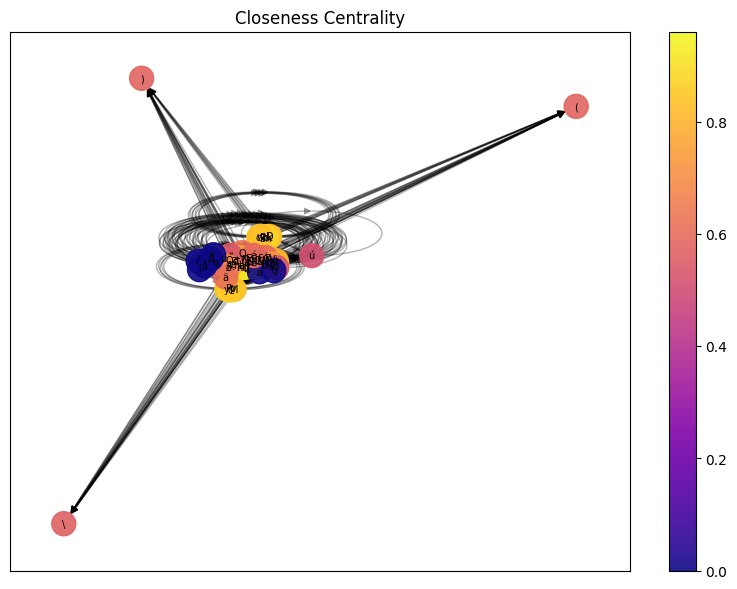

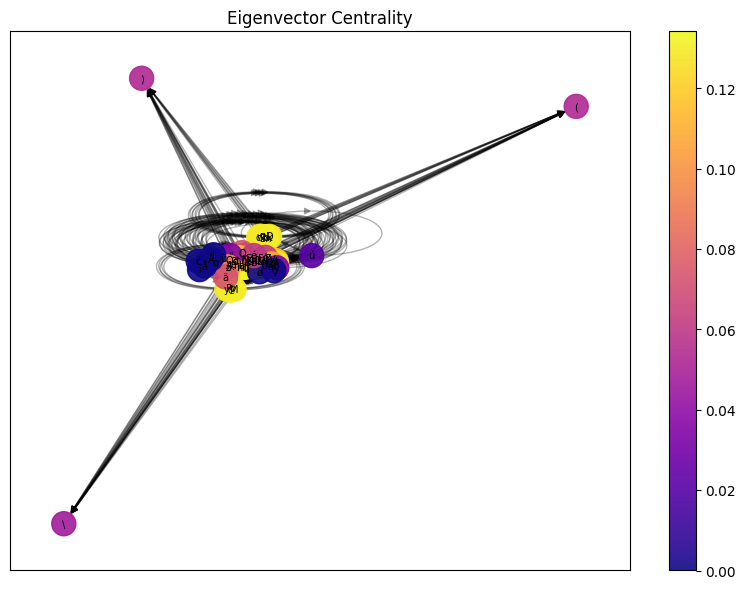

In [ ]:
# Convert centrality values into node colors
node_color_degree = [degree_centrality[node] for node in G_author_citation.nodes()]
node_color_betweenness = [betweenness_centrality[node] for node in G_author_citation.nodes()]
node_color_closeness = [closeness_centrality[node] for node in G_author_citation.nodes()]
node_color_eigenvector = [eigenvector_centrality[node] for node in G_author_citation.nodes()]

# Function to plot graph with centrality-based coloring
def plot_graph(G, title, node_colors):
    plt.figure(figsize=(10, 7))
    pos = nx.spring_layout(G, seed=42)  # Layout for graph
    nodes = nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=plt.cm.plasma, alpha=0.9)
    nx.draw_networkx_edges(G, pos, alpha=0.3)
    nx.draw_networkx_labels(G, pos, font_size=7)
    plt.colorbar(nodes)  # Proper colorbar placement
    plt.title(title)
    plt.show()

# 🔹 Plot Graphs Based on Centrality
plot_graph(G_author_citation, "Degree Centrality", node_color_degree)
plot_graph(G_author_citation, "Betweenness Centrality", node_color_betweenness)
plot_graph(G_author_citation, "Closeness Centrality", node_color_closeness)
plot_graph(G_author_citation, "Eigenvector Centrality", node_color_eigenvector)

###Multi-Word User Query with NLP (TF-IDF)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from tabulate import tabulate

# Load dataset (Assuming 'title', 'id', 'abstract', and 'authors' columns exist)
# df = pd.read_csv("author_research_data.csv")

# TF-IDF vectorization on paper titles
vectorizer = TfidfVectorizer(stop_words="english")
tfidf_matrix = vectorizer.fit_transform(df["title"])  # Convert titles to vector form

def search_best_authors(query):
    """Finds the best-matching authors based on the research topic."""
    query_tfidf = vectorizer.transform([query])  # Convert query to TF-IDF
    cosine_sim = cosine_similarity(query_tfidf, tfidf_matrix).flatten()  # Compute cosine similarity

    # Get top 5 matches
    top_indices = cosine_sim.argsort()[-5:][::-1]

    # Return relevant columns: Title, ID, and Authors
    return df.iloc[top_indices][["id", "title", "authors"]]

# User input for research topic
query = input("\nEnter a research topic: ")
best_authors = search_best_authors(query)

# Print results in a structured table format
print("\nTop 5 Matching Research Papers:\n")
print(tabulate(best_authors, headers="keys", tablefmt="fancy_grid", showindex=False))


Enter a research topic: Big Data

Top 5 Matching Research Papers:

╒══════════════════════════════════════╤═════════════════════════════════════════════════════════════════════════════════════╤═════════════════════════════════════════════════════════════════════════╕
│ id                                   │ title                                                                               │ authors                                                                 │
╞══════════════════════════════════════╪═════════════════════════════════════════════════════════════════════════════════════╪═════════════════════════════════════════════════════════════════════════╡
│ fa30decd-8f03-432a-8240-268166b4d62a │ Organizing and training for a new software development project: that big first step │ ["['Daniel P. Freedman'", "'Donald C. Gause'", "'Gerald M. Weinberg']"] │
├──────────────────────────────────────┼─────────────────────────────────────────────────────────────────────────────────────┼──

##**Co-authorship Network**
connection bw authers work together in a paper

### Split and combine each pair of authors

In [ ]:
df = pd.read_csv("filtered_1980.csv")

# Ensure 'authors' column is a list (if stored as a string)
def convert_to_list(authors):
    if isinstance(authors, str):
        try:
            return ast.literal_eval(authors) if "[" in authors else [a.strip() for a in authors.split(',')]
        except:
            return [a.strip() for a in authors.split(',')]
    return authors  # Return as is if already a list

df["authors"] = df["authors"].apply(convert_to_list)

# Calculate the number of authors per paper
df["num_authors"] = df["authors"].apply(len)

# Find the maximum number of authors in a single paper
max_authors = df["num_authors"].max()

# Get all papers that have this maximum number of authors
papers_with_max_authors = df[df["num_authors"] == max_authors]

# Display the results
print(f"Highest Number of Authors in a Single Paper: {max_authors}")
print("\nPapers with Maximum Authors:")
print(papers_with_max_authors[["title", "authors"]])

Highest Number of Authors in a Single Paper: 9

Papers with Maximum Authors:
                                                  title  \
4140  Spezialisten für Informationstechnik und Fachv...   

                                                authors  
4140  [Hans Brinckmann, Eckhard Fuchs, Kenneth L. Kr...  


In [ ]:
from itertools import combinations

# Drop rows with missing authors
new_data = data.dropna(subset=['authors'])

# Create an empty list to store author connections
author_connections = []

# Iterate through each row in the DataFrame
for index, row in new_data.iterrows():
    title = row['title']
    authors = row['authors']

    # Split authors into a list and strip spaces
    authors_list = [a.strip() for a in authors.split(',')]

    # Generate all possible pairs of authors (only if more than 1 author exists)
    if len(authors_list) > 1:
        for author1, author2 in combinations(authors_list, 2):
            author_connections.append({'title': title, 'author1': author1, 'author2': author2})

# Convert the list of connections to a DataFrame
connections_data = pd.DataFrame(author_connections)

# Display the new DataFrame
print(connections_data.head())

# Save the new DataFrame to a CSV file
connections_data.to_csv('author_filtered_1980.csv', index=False)

                                               title              author1  \
0                              The Model II Unityper      ['L. D. Wilson'   
1  Solution of Linear Differential Equations with...   ['Carl Ellis Howe'   
2  Linear Programming and Profit Preference Sched...        ['A. Charnes'   
3  Linear Programming and Profit Preference Sched...        ['A. Charnes'   
4  Linear Programming and Profit Preference Sched...  'William W. Cooper'   

               author2  
0        'Saul Meyer']  
1    'Robert M. Howe']  
2  'William W. Cooper'  
3       'Donald Farr']  
4       'Donald Farr']  


###Import file

In [ ]:
from google.colab import files

uploaded = files.upload()  # Upload your dataset
df2 = pd.read_csv(list(uploaded.keys())[0])  # Read dataset into a pandas DataFrame

Saving authors_1980.csv to authors_1980.csv


In [ ]:
df2 = connections_data
df2

,title,author1,author2
0,The Model II Unityper,['L. D. Wilson','Saul Meyer']
1,Solution of Linear Differential Equations with...,['Carl Ellis Howe','Robert M. Howe']
2,Linear Programming and Profit Preference Sched...,['A. Charnes','William W. Cooper'
3,Linear Programming and Profit Preference Sched...,['A. Charnes','Donald Farr']
4,Linear Programming and Profit Preference Sched...,'William W. Cooper','Donald Farr']
...,...,...,...
4075,On dynamic logic.,['Petr Hájek','Petr Kurka']
4076,On dynamic logic.,'Pavel Kalášek','Petr Kurka']
4077,Multiple access channels with arbitrarily corr...,['Thomas M. Cover','Abbas El Gamal'
4078,Multiple access channels with arbitrarily corr...,['Thomas M. Cover','Masoud Salehi']


###Build Co-Authorship Network

In [ ]:
# Initialize an undirected graph
G_coauthor = nx.Graph()

# Create edges between authors (only 2 per row)
for _, row in df2.iterrows():
    author1, author2 = row['author1'], row['author2']

    # Ensure authors are valid (not NaN)
    if pd.notna(author1) and pd.notna(author2):
        G_coauthor.add_edge(author1.strip(), author2.strip())  # Add edge

print(f"Number of nodes: {G_coauthor.number_of_nodes()}")
print(f"Number of edges: {G_coauthor.number_of_edges()}")

Number of nodes: 4066
Number of edges: 3934


###Visualize Co-Authorship Graph

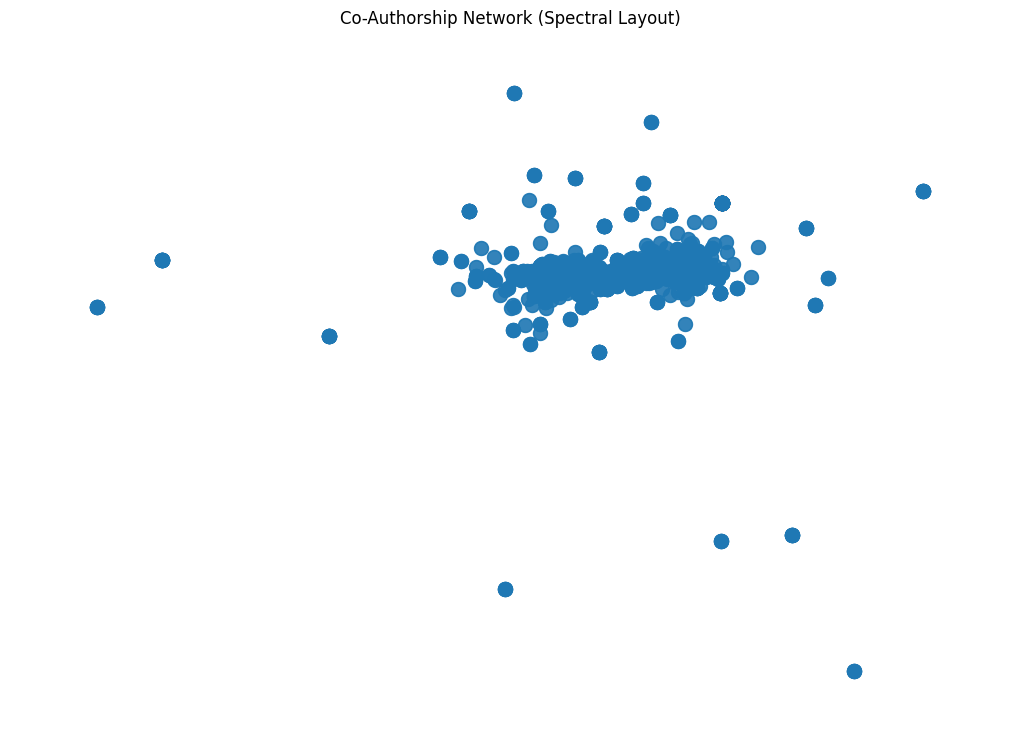

In [ ]:
# Set figure size
plt.figure(figsize=(10, 7))

# Use spectral layout on the same graph
pos = nx.spectral_layout(G_coauthor)

# Draw the graph (now using the correct variable)
nx.draw(G_coauthor, pos, node_size=100, alpha=0.7, edge_color="gray")

# Title and display
plt.title("Co-Authorship Network (Spectral Layout)")
plt.show()


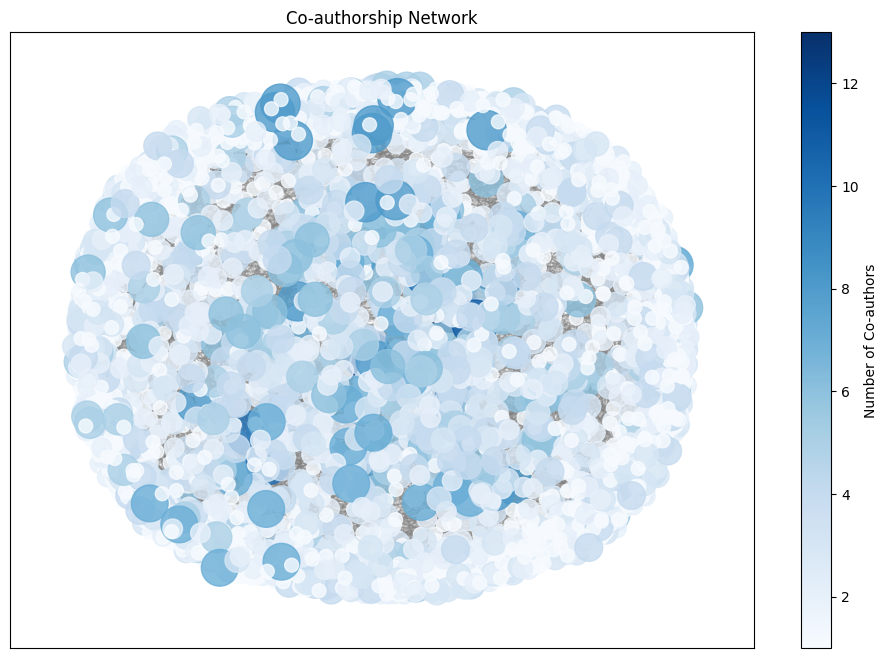

In [ ]:
# Compute node sizes and colors based on degree centrality
node_degree = dict(G_coauthor.degree())  # Get degree of each node
node_size = [node_degree[node] * 100 for node in G_coauthor.nodes()]  # Scale for visibility
node_color = [node_degree[node] for node in G_coauthor.nodes()]  # Use degree for coloring

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Generate graph layout
pos = nx.spring_layout(G_coauthor, seed=42, k=0.3)

# Draw the graph
nodes = nx.draw_networkx_nodes(G_coauthor, pos, node_size=node_size, node_color=node_color, cmap=plt.cm.Blues, alpha=0.8, ax=ax)
nx.draw_networkx_edges(G_coauthor, pos, alpha=0.3, edge_color="gray", ax=ax)

# Fix: Create ScalarMappable object for colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=min(node_color), vmax=max(node_color)))
sm.set_array([])  # Important for colorbar
cbar = plt.colorbar(sm, ax=ax)  # Explicitly set axis
cbar.set_label("Number of Co-authors")

# Set title
ax.set_title("Co-authorship Network")

# Show plot
plt.show()

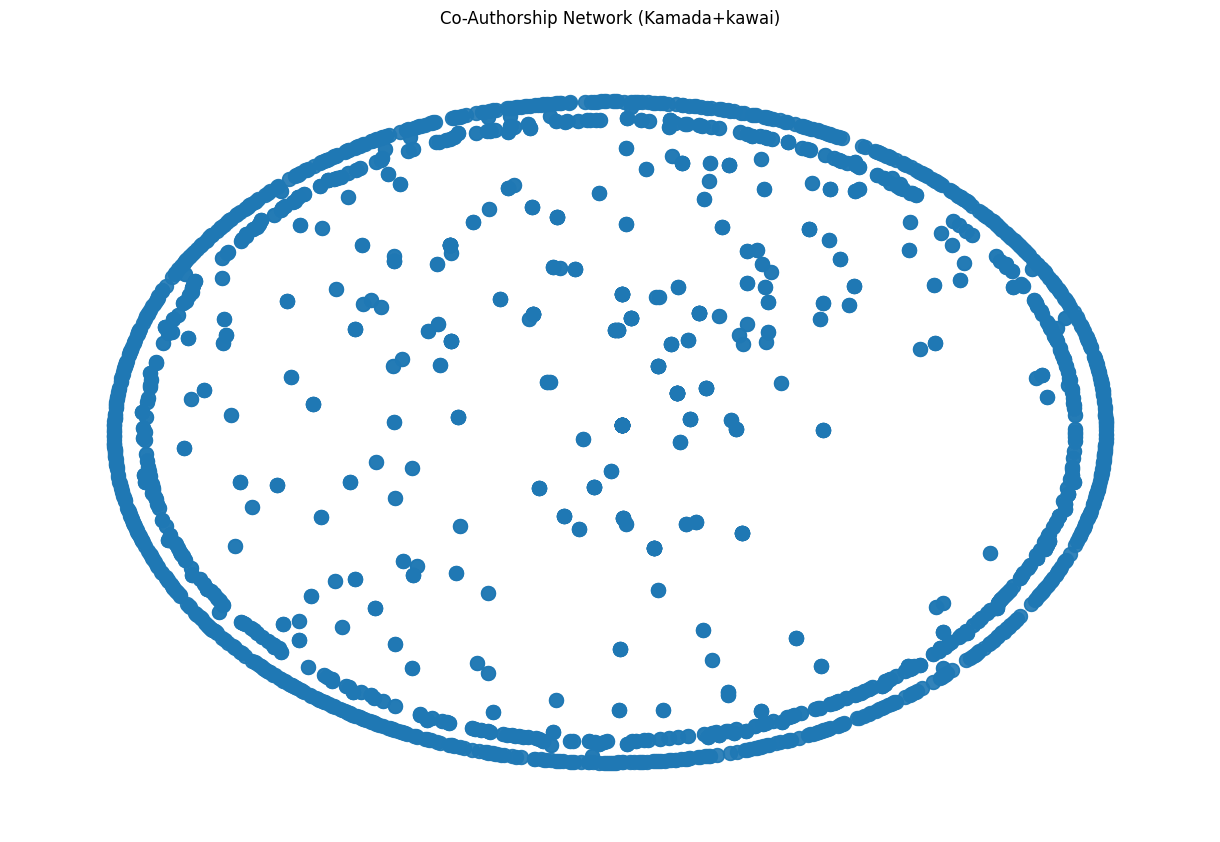

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Compute layout (Choose one of the best layouts)
pos = nx.kamada_kawai_layout(G_coauthor)

# Plot the graph
plt.figure(figsize=(12, 8))
nx.draw(G_coauthor, pos, node_size=100, alpha=0.7, edge_color="gray")

# Title
plt.title("Co-Authorship Network (Kamada+kawai)")
plt.show()

###Compute 4 types of Centrality Measures

In [ ]:
# Compute centrality measures
degree_centrality = nx.degree_centrality(G_coauthor)
betweenness_centrality = nx.betweenness_centrality(G_coauthor)
closeness_centrality = nx.closeness_centrality(G_coauthor)
eigenvector_centrality = nx.eigenvector_centrality(G_coauthor, max_iter=1000)

# Store in DataFrame
coauthor_centrality_df = pd.DataFrame({
    'author': list(G_coauthor.nodes()),
    'degree': [degree_centrality.get(node, 0) for node in G_coauthor.nodes()],
    'betweenness': [betweenness_centrality.get(node, 0) for node in G_coauthor.nodes()],
    'closeness': [closeness_centrality.get(node, 0) for node in G_coauthor.nodes()],
    'eigenvector': [eigenvector_centrality.get(node, 0) for node in G_coauthor.nodes()]
})

# Save to CSV
coauthor_centrality_df.to_csv('coauthor_metric.csv', index=False)

In [ ]:
centrality_coauthor_data= pd.read_csv("coauthor_metric.csv")
centrality_coauthor_data

,author,degree,betweenness,closeness,eigenvector
0,['L. D. Wilson',0.000246,0.000000,0.000246,3.276843e-33
1,'Saul Meyer'],0.000246,0.000000,0.000246,3.276843e-33
2,['Carl Ellis Howe',0.000246,0.000000,0.000246,3.276843e-33
3,'Robert M. Howe'],0.000246,0.000000,0.000246,3.276843e-33
4,['A. Charnes',0.001476,0.000001,0.001476,2.951518e-18
...,...,...,...,...,...
4061,['Petr Hájek',0.000492,0.000000,0.000492,1.392924e-24
4062,'Pavel Kalášek',0.000492,0.000000,0.000492,1.392924e-24
4063,'Petr Kurka'],0.000492,0.000000,0.000492,1.392924e-24
4064,'Abbas El Gamal',0.000492,0.000000,0.000984,1.265404e-19


### Best authors based on centrality measure of co-authership

In [ ]:
# Normalize values between 0-1 for fair ranking & explicitly cast to float
coauthor_centrality_df.iloc[:, 1:] = centrality_df.iloc[:, 1:].apply(lambda x: (x - x.min()) / (x.max() - x.min())).astype(float)

# Compute overall score
coauthor_centrality_df["Overall Score"] = centrality_df.iloc[:, 1:].sum(axis=1)

# Sort authors based on Overall Score (Descending)
coauthor_centrality_df = centrality_df.sort_values(by="Overall Score", ascending=False)

# Get Top 10 Best Authors
top_5_authors = coauthor_centrality_df.head(10)

# Display Results
print("Top 10 Authors Based on Centrality Measures:")
print(top_5_authors[
    ["Author", "Degree Centrality", "Betweenness Centrality", "Closeness Centrality", "Eigenvector Centrality", "Overall Score"]
].to_string(index=False))

Top 10 Authors Based on Centrality Measures:
                 Author  Degree Centrality  Betweenness Centrality  Closeness Centrality  Eigenvector Centrality  Overall Score
         ['E. F. Codd']           1.000000                0.073723              0.924354            3.544970e-04       1.998432
     ['Robert M. Gray']           0.475610                0.853205              0.548851            9.143501e-04       1.878580
     ['Thomas M. Cover'           0.280488                1.000000              0.344310            5.165682e-08       1.624798
     ['C. A. R. Hoare']           0.500000                0.081684              1.000000            5.785419e-07       1.581685
          ['Jacob Ziv']           0.329268                0.471078              0.614503            1.521880e-03       1.416371
   ['C. V. Ramamoorthy'           0.512195                0.593115              0.297161            5.672673e-11       1.402471
           'Jacob Ziv']           0.292683                0

###User Query (find co-authors or collaborators of any author from co-authorship graph)

In [ ]:
def get_top_collaborators(author, top_n=5):
    if author in G_coauthor:
        neighbors = list(G_coauthor.neighbors(author))
        sorted_neighbors = sorted(neighbors, key=lambda x: degree_centrality.get(x, 0), reverse=True)
        return sorted_neighbors[:top_n]
    else:
        return []

# User Input
query_author = input("Enter an author's name: ").strip()
top_collaborators = get_top_collaborators(query_author)

if top_collaborators:
    print(f"Top {len(top_collaborators)} collaborators of {query_author}: {top_collaborators}")
else:
    print("Author not found or has no collaborators.")

Enter an author's name: 'A. Charnes'
Top 2 collaborators of 'A. Charnes': ["['Adi Ben-Israel'", "'M. J. L. Kirby']"]


##**Paper Citation Network**
connection bw papers cited by each other

###Build paper citation network

In [ ]:
df['references'] = df['references'].fillna('').astype(str)

In [ ]:
G_citation = nx.DiGraph()

for _, row in df.iterrows():
    citing_paper = row['id']
    cited_papers = row['references'].split(';') if isinstance(row['references'], str) else []

    for cited_paper in cited_papers:
        G_citation.add_edge(citing_paper, cited_paper)

In [ ]:
print(f"Number of nodes: {G_citation.number_of_nodes()}")
print(f"Number of edges: {G_citation.number_of_edges()}")

Number of nodes: 6850
Number of edges: 4491


###Visualize Paper-Citation Graph

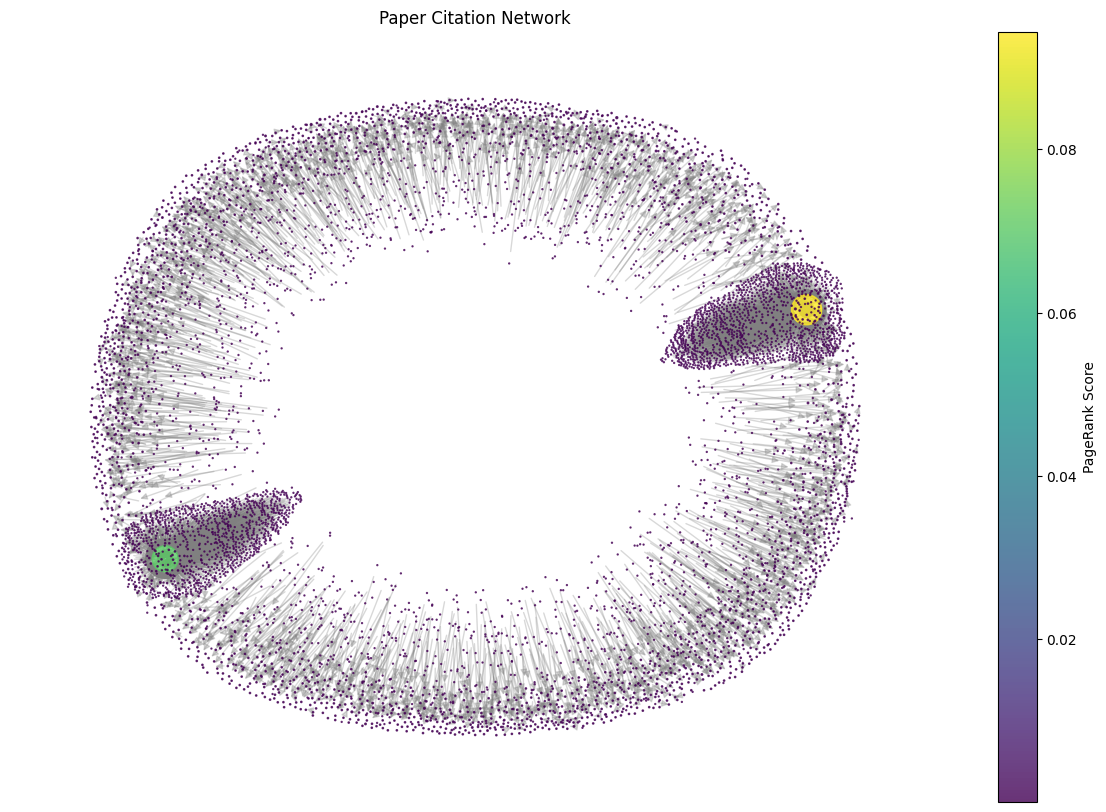

In [ ]:
plt.figure(figsize=(15, 10))

# Compute layout (optimized for large graphs)
pos = nx.spring_layout(G_citation, k=0.05, seed=42)  # Adjust k to spread nodes

# Compute node size & color based on PageRank (importance of paper)
pagerank_scores = nx.pagerank(G_citation)
node_size = [pagerank_scores[node] * 5000 for node in G_citation.nodes()]
node_color = [pagerank_scores[node] for node in G_citation.nodes()]

# Draw nodes
nodes = nx.draw_networkx_nodes(G_citation, pos, node_size=node_size,
                               node_color=node_color, cmap=plt.cm.viridis, alpha=0.8)

# Draw edges with transparency
nx.draw_networkx_edges(G_citation, pos, alpha=0.3, edge_color="gray")

# Add colorbar for PageRank values
plt.colorbar(nodes, label="PageRank Score")

# Set title and show graph
plt.title("Paper Citation Network")
plt.axis("off")
plt.show()


###Compute 4 types of Centrality Measures

In [ ]:
# Compute centrality measures for the citation network
betweenness_centrality = nx.betweenness_centrality(G_citation)
closeness_centrality = nx.closeness_centrality(G_citation)
degree_centrality = nx.degree_centrality(G_citation)
eigenvector_centrality = nx.eigenvector_centrality(G_citation, max_iter=1000)

# Create a DataFrame
centrality_papercitation_df = pd.DataFrame({
    'paper_id': list(G_citation.nodes()),
    'betweenness': [betweenness_centrality[node] for node in G_citation.nodes()],
    'closeness': [closeness_centrality[node] for node in G_citation.nodes()],
    'degree': [degree_centrality[node] for node in G_citation.nodes()],
    'eigenvector': [eigenvector_centrality[node] for node in G_citation.nodes()]
})

# Save the DataFrame to a CSV file
centrality_papercitation_df.to_csv('Paper_citation_metric.csv', index=False)

In [ ]:
papercitation_centrality= pd.read_csv("Paper_citation_metric.csv")
papercitation_centrality

,paper_id,betweenness,closeness,degree,eigenvector
0,4fca075d-965a-4022-8891-e9d1e326e464,0.0,0.000000,0.000146,0.000025
1,[],0.0,0.171850,0.171850,0.801998
2,b6b5baab-032f-4598-aeb2-f2bb7f12b4c7,0.0,0.000000,0.000146,0.000025
3,f821fbaa-1f89-427f-b5e8-4c904a02e2e7,0.0,0.000000,0.000146,0.000025
4,['7dc8b493-dd60-4580-bcd2-cea02ca46473'],0.0,0.000292,0.000292,0.001388
...,...,...,...,...,...
6845,49829369-a417-4a86-bc78-caca4b6832fc,0.0,0.000000,0.000146,0.000025
6846,"['b001b8d1-2cc3-4b88-9f82-0f0b0a871c8e', 'c0b1...",0.0,0.000146,0.000146,0.000707
6847,7d9f36a2-738f-4152-b60b-9a135d76bbc1,0.0,0.000000,0.000146,0.000025
6848,7b7b8ac1-d61f-4b87-b745-73352713e600,0.0,0.000000,0.000146,0.000025


### Best Paper based on centrality measure of paper citation

In [ ]:
# Normalize values between 0-1 for fair ranking & explicitly cast to float
centrality_papercitation_df.iloc[:, 1:] = centrality_df.iloc[:, 1:].apply(lambda x: (x - x.min()) / (x.max() - x.min())).astype(float)

# Compute overall score
centrality_papercitation_df["Overall Score"] = centrality_df.iloc[:, 1:].sum(axis=1)

# Sort papers based on Overall Score (Descending)
centrality_papercitation_df = centrality_df.sort_values(by="Overall Score", ascending=False)

# Get Top 10 Best Papers
top_10_papers = centrality_papercitation_df.head(10)

# Display Results
print("Top 10 papers Based on Centrality Measures:")
print(top_10_papers[
    ["Degree Centrality", "Betweenness Centrality", "Closeness Centrality", "Eigenvector Centrality", "Overall Score"]
].to_string(index=False))

Top 10 papers Based on Centrality Measures:
 Degree Centrality  Betweenness Centrality  Closeness Centrality  Eigenvector Centrality  Overall Score
          1.000000                0.073723              0.924354            3.544970e-04       1.998432
          0.475610                0.853205              0.548851            9.143501e-04       1.878580
          0.280488                1.000000              0.344310            5.165682e-08       1.624798
          0.500000                0.081684              1.000000            5.785419e-07       1.581685
          0.329268                0.471078              0.614503            1.521880e-03       1.416371
          0.512195                0.593115              0.297161            5.672673e-11       1.402471
          0.292683                0.433966              0.598746            5.884041e-04       1.325983
          0.353659                0.061542              0.880046            2.866089e-05       1.295275
          0.353659  

###User Query(most relevant papers based on pagerank score)

In [ ]:
from tabulate import tabulate  # Import tabulate for better table formatting

def get_top_papers(query, top_n=5):
    """Fetches top research papers based on query and PageRank score."""
    filtered_papers = df[df['title'].str.contains(query, case=False, na=False)].copy()

    # Map PageRank scores and handle NaN values
    filtered_papers['pagerank'] = filtered_papers['id'].map(pagerank_scores).fillna(0.0)

    # Sort by PageRank and return top N papers
    return filtered_papers.sort_values(by='pagerank', ascending=False).head(top_n)

# User input
query = input("\nEnter a subject to search for: ")

# Get top papers based on search
top_papers = get_top_papers(query)

# Display results in a structured table format
if top_papers.empty:
    print("\nNo matching papers found!")
else:
    print("\nTop Research Papers:\n")
    print(tabulate(top_papers[['title', 'authors', 'pagerank']],
                   headers=["Title", "Authors", "PageRank"],
                   tablefmt="fancy_grid",
                   showindex=False,
                   floatfmt=".8f"))  # Format PageRank to 4 decimal places



Enter a subject to search for: Hashing

Top Research Papers:

╒═══════════════════════════════════════════╤═════════════════════════════════════════════════════╤════════════╕
│ Title                                     │ Authors                                             │   PageRank │
╞═══════════════════════════════════════════╪═════════════════════════════════════════════════════╪════════════╡
│ There is no fast single hashing algorithm │ ['Miklós Ajtai', 'János Komlós', 'Endre Szemerédi'] │ 0.00009347 │
╘═══════════════════════════════════════════╧═════════════════════════════════════════════════════╧════════════╛
